# <font color= yellow> **SUPPORT VECTOR MACHINES** <font color= green> 
## SNOW PREDICTION USING MULTI-CLASS SVM!
### REQUIRED LIBRARIES:

In [57]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV



### <font color= yellow> **DATA USED**:

In [58]:
data = pd.read_csv("road.csv")
data.head()
print(data)

         PRCP      SNWD      SNOW      TMAX      TMIN      AWND      WDF2  \
0   -0.224531 -0.384776  0.139583 -1.628673 -1.265519  0.013752  0.532443   
1    1.090609  1.399762  0.425421 -1.950514 -1.803736  1.917751 -1.608526   
2   -0.311054  4.076568  0.082415 -2.280824 -2.390007 -0.217035 -1.900476   
3   -0.397576  3.719661  0.038587 -0.925705 -2.015178  0.071449 -0.051458   
4   -0.311054  3.184300  0.038587 -0.459882 -0.631193 -0.678611 -0.246091   
..        ...       ...       ...       ...       ...       ...       ...   
359 -0.397576 -0.384776  0.038587 -0.459882 -0.371696  0.013752  0.629759   
360 -0.397576 -0.384776  0.038587 -0.078755 -0.419751 -0.101641  0.045859   
361 -0.172618 -0.384776  0.038587 -0.171919 -0.467806  0.763812  0.921709   
362 -0.397576 -0.384776  0.044304 -1.162851 -0.736914 -0.505520 -1.900476   
363 -0.051487  0.150586  0.130055 -1.433875 -1.006022 -0.678611  0.629759   

         WDF5      WSF2      WSF5           snow  
0    0.512976 -0.281772 

### <font color= yellow> **DATA SHAPE** 

In [59]:
data.shape

(364, 11)

In [60]:
L = list(data["snow"].unique()) 
# len(L)
L

['Heavy Snow', 'Little Snow', 'Moderate Snow', 'Slight Snow']

## <font color = "orange"> **LABELING THE OUTPUT** 

In [61]:
lc=LabelEncoder()
data["snow"]=lc.fit_transform(data["snow"])
data.head()

,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,snow
0,-0.224531,-0.384776,0.139583,-1.628673,-1.265519,0.013752,0.532443,0.512976,-0.281772,-0.259545,0
1,1.090609,1.399762,0.425421,-1.950514,-1.803736,1.917751,-1.608526,-1.774031,1.229166,1.091295,0
2,-0.311054,4.076568,0.082415,-2.280824,-2.390007,-0.217035,-1.900476,-1.972901,0.164641,-0.034405,0
3,-0.397576,3.719661,0.038587,-0.925705,-2.015178,0.071449,-0.051458,0.015801,0.473697,0.540953,1
4,-0.311054,3.184300,0.038587,-0.459882,-0.631193,-0.678611,-0.246091,-0.183069,0.473697,0.641015,2


## <font color="orange"> **After labeling**

In [62]:
L = list(data["snow"].unique()) 
# len(L)
L

[0, 1, 2, 3]

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    364 non-null    float64
 1   SNWD    364 non-null    float64
 2   SNOW    364 non-null    float64
 3   TMAX    364 non-null    float64
 4   TMIN    364 non-null    float64
 5   AWND    364 non-null    float64
 6   WDF2    364 non-null    float64
 7   WDF5    364 non-null    float64
 8   WSF2    364 non-null    float64
 9   WSF5    364 non-null    float64
 10  snow    364 non-null    int32  
dtypes: float64(10), int32(1)
memory usage: 30.0 KB


### <font color= orange > **NUMERICAL VARIABLES :**

In [64]:
data[["SNWD","SNOW","TMAX","TMIN","AWND","WDF2","WDF5","WSF2","WSF5"]].describe()

,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,-0.000414,-0.000452,0.004335,0.003345,-0.004317,-0.000928,-0.000590,-0.002528,-0.002380
std,1.001345,1.001339,0.997937,0.999330,0.997964,1.001219,1.001313,1.000208,1.000341
min,-0.384776,-19.015380,-2.424806,-2.553394,-1.601762,-1.900476,-1.972901,-1.827049,-1.810510
25%,-0.384776,0.038587,-0.800780,-0.679248,-0.794005,-0.635358,-0.680245,-0.762525,-0.709825
50%,-0.384776,0.038587,0.056757,0.108855,-0.159338,0.435126,0.413541,-0.281772,-0.259545
75%,-0.384776,0.038587,0.903707,0.800847,0.590722,0.629759,0.711846,0.473697,0.565969
max,6.931829,0.758899,1.657493,1.867669,3.706356,1.505610,1.507327,3.529912,3.542821


# <font color= yellow> **GRAPH** 

## <font color = "orange">  ***Histogram*** of the input (parameter) above data::

c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py

<Axes: xlabel='WSF5', ylabel='Count'>

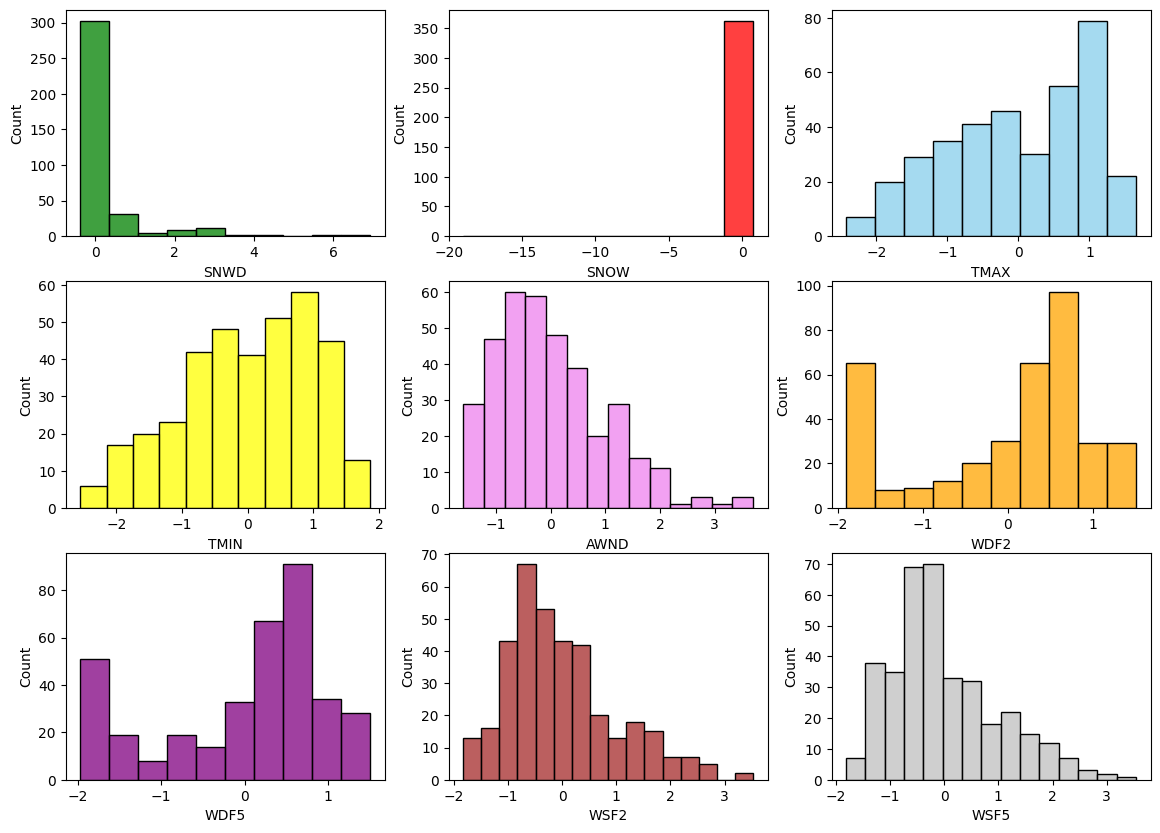

In [65]:
fig,axs=plt.subplots(3,3,figsize=(14,10))
seaborn.histplot(data=data,x="SNWD",ax=axs[0,0],color='green')
seaborn.histplot(data=data,x="SNOW",ax=axs[0,1],color='red')
seaborn.histplot(data=data,x="TMAX",ax=axs[0,2],color='skyblue')
seaborn.histplot(data=data,x="TMIN",ax=axs[1,0],color='yellow')
seaborn.histplot(data=data,x="AWND",ax=axs[1,1],color='violet')
seaborn.histplot(data=data,x="WDF2",ax=axs[1,2],color='orange')
seaborn.histplot(data=data,x="WDF5",ax=axs[2,0],color='purple')
seaborn.histplot(data=data,x="WSF2",ax=axs[2,1],color='brown')
seaborn.histplot(data=data,x="WSF5",ax=axs[2,2],color='silver')

### **DATA EXPLORATION**

In [66]:
countHeavySnow=54
countLittleSnow=181
countModerateSnow=114
countSlightSnow=15

print("Percent of Heavy Snow:",(countHeavySnow/(len(data.snow))*100),"%")
print("Percent of Little Snow:",(countLittleSnow/(len(data.snow))*100),"%")
print("Percent of Moderate Snow:",(countModerateSnow/(len(data.snow))*100),"%")
print("Percent of Slight Snow:",(countSlightSnow/(len(data.snow))*100),"%")


Percent of Heavy Snow: 14.835164835164836 %
Percent of Little Snow: 49.72527472527473 %
Percent of Moderate Snow: 31.318681318681318 %
Percent of Slight Snow: 4.1208791208791204 %


## <font color = orange> **Scatter Plotter of Input parameters**
### <font color = orange> **The realationship was analysed between different parameters and scatter plots were used to find the analysis. Different patterns were found between parameters and the relationship was established...this shows how each parameters affect the overall model**


### <font color = orange> **SNWD w.r.t all other input parameters**

c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

<Axes: xlabel='SNWD', ylabel='WSF5'>

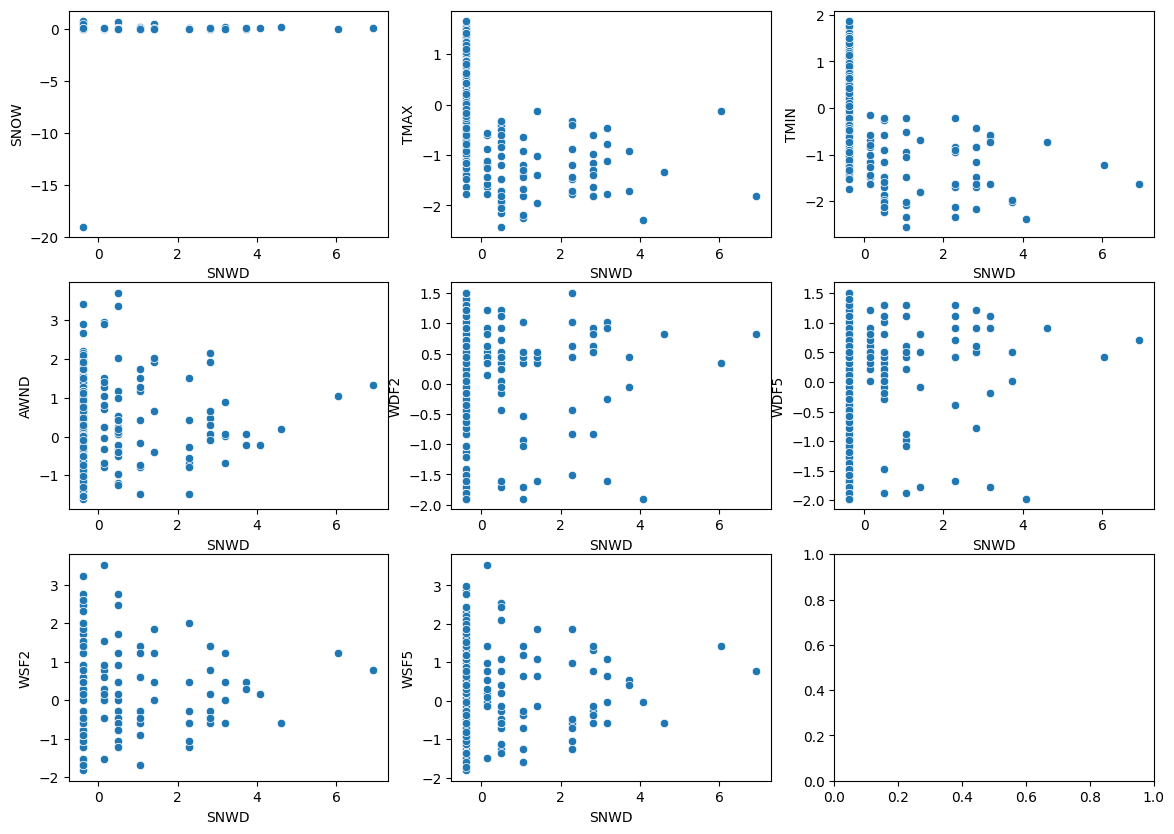

In [67]:
fig, axs = plt.subplots(3, 3, figsize=(14, 10))
seaborn.scatterplot(x="SNWD",y="SNOW",ax=axs[0, 0],data=data)
seaborn.scatterplot(x="SNWD",y="TMAX",ax=axs[0, 1],data=data)
seaborn.scatterplot(x="SNWD",y="TMIN",ax=axs[0, 2],data=data) ## take this only one for paper
seaborn.scatterplot(x="SNWD",y="AWND",ax=axs[1, 0],data=data)
seaborn.scatterplot(x="SNWD",y="WDF2",ax=axs[1, 1],data=data)
seaborn.scatterplot(x="SNWD",y="WDF5",ax=axs[1, 2],data=data)
seaborn.scatterplot(x="SNWD",y="WSF2",ax=axs[2, 0],data=data)
seaborn.scatterplot(x="SNWD",y="WSF5",ax=axs[2, 1],data=data)


## **<font color = orange>SNOW w.r.t all other input parameters** 

c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

<Axes: xlabel='SNOW', ylabel='WSF5'>

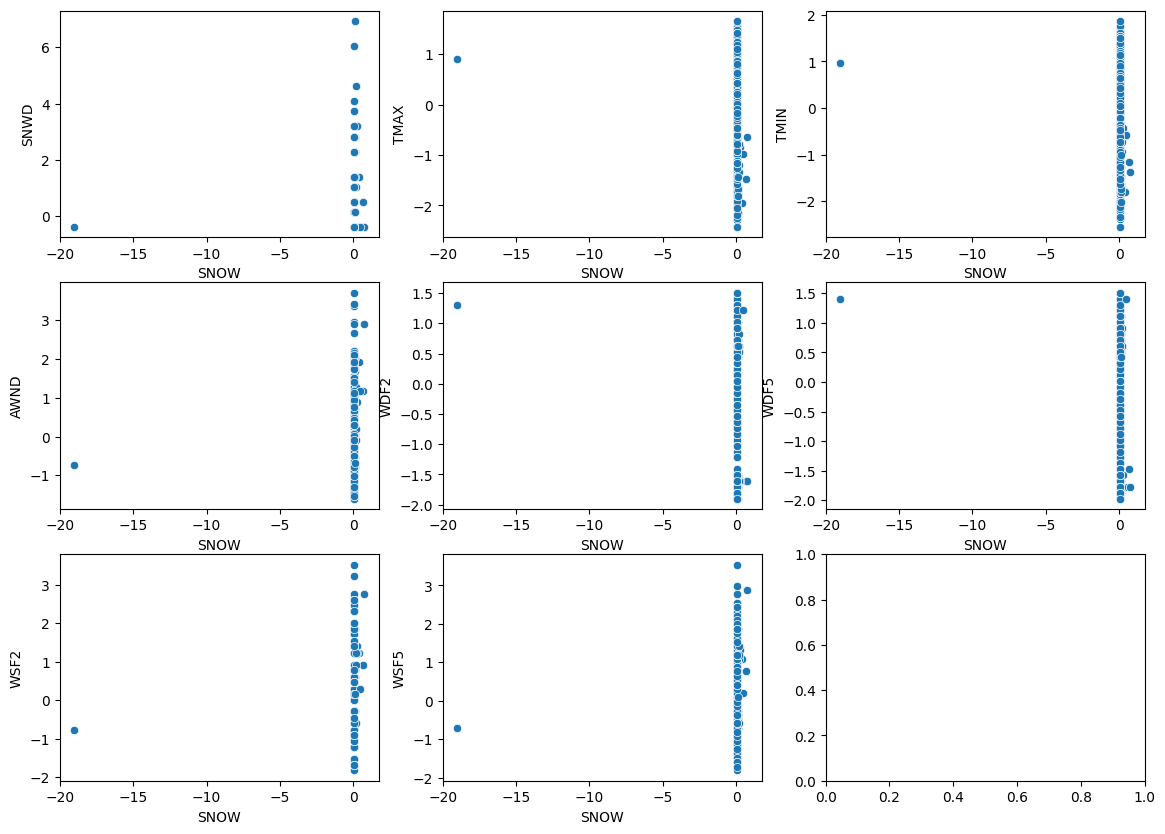

In [68]:
fig, axs = plt.subplots(3, 3, figsize=(14, 10))
seaborn.scatterplot(x="SNOW",y="SNWD",ax=axs[0, 0],data=data)
seaborn.scatterplot(x="SNOW",y="TMAX",ax=axs[0, 1],data=data) ## take this only one graph for paper
seaborn.scatterplot(x="SNOW",y="TMIN",ax=axs[0, 2],data=data)
seaborn.scatterplot(x="SNOW",y="AWND",ax=axs[1, 0],data=data)
seaborn.scatterplot(x="SNOW",y="WDF2",ax=axs[1, 1],data=data)
seaborn.scatterplot(x="SNOW",y="WDF5",ax=axs[1, 2],data=data)
seaborn.scatterplot(x="SNOW",y="WSF2",ax=axs[2, 0],data=data)
seaborn.scatterplot(x="SNOW",y="WSF5",ax=axs[2, 1],data=data)


## **<font color = orange>TMAX w.r.t all other input parameters** 

c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

<Axes: xlabel='TMAX', ylabel='WSF5'>

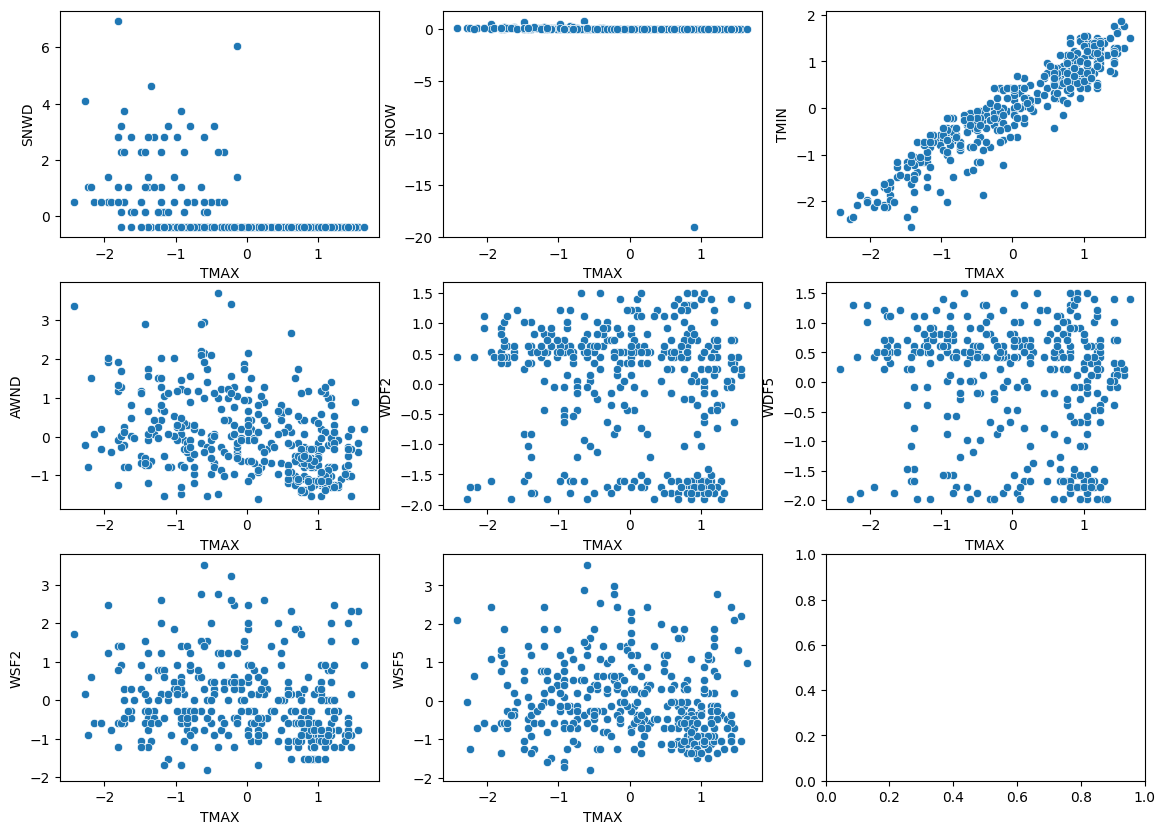

In [69]:
fig, axs = plt.subplots(3, 3, figsize=(14, 10))
seaborn.scatterplot(x="TMAX",y="SNWD",ax=axs[0, 0],data=data)
seaborn.scatterplot(x="TMAX",y="SNOW",ax=axs[0, 1],data=data)
seaborn.scatterplot(x="TMAX",y="TMIN",ax=axs[0, 2],data=data)# take this only one graph for paper
seaborn.scatterplot(x="TMAX",y="AWND",ax=axs[1, 0],data=data)
seaborn.scatterplot(x="TMAX",y="WDF2",ax=axs[1, 1],data=data)
seaborn.scatterplot(x="TMAX",y="WDF5",ax=axs[1, 2],data=data)
seaborn.scatterplot(x="TMAX",y="WSF2",ax=axs[2, 0],data=data)
seaborn.scatterplot(x="TMAX",y="WSF5",ax=axs[2, 1],data=data)


## **<font color = orange>TMIN w.r.t all other input parameters** 

c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

<Axes: xlabel='TMIN', ylabel='WSF5'>

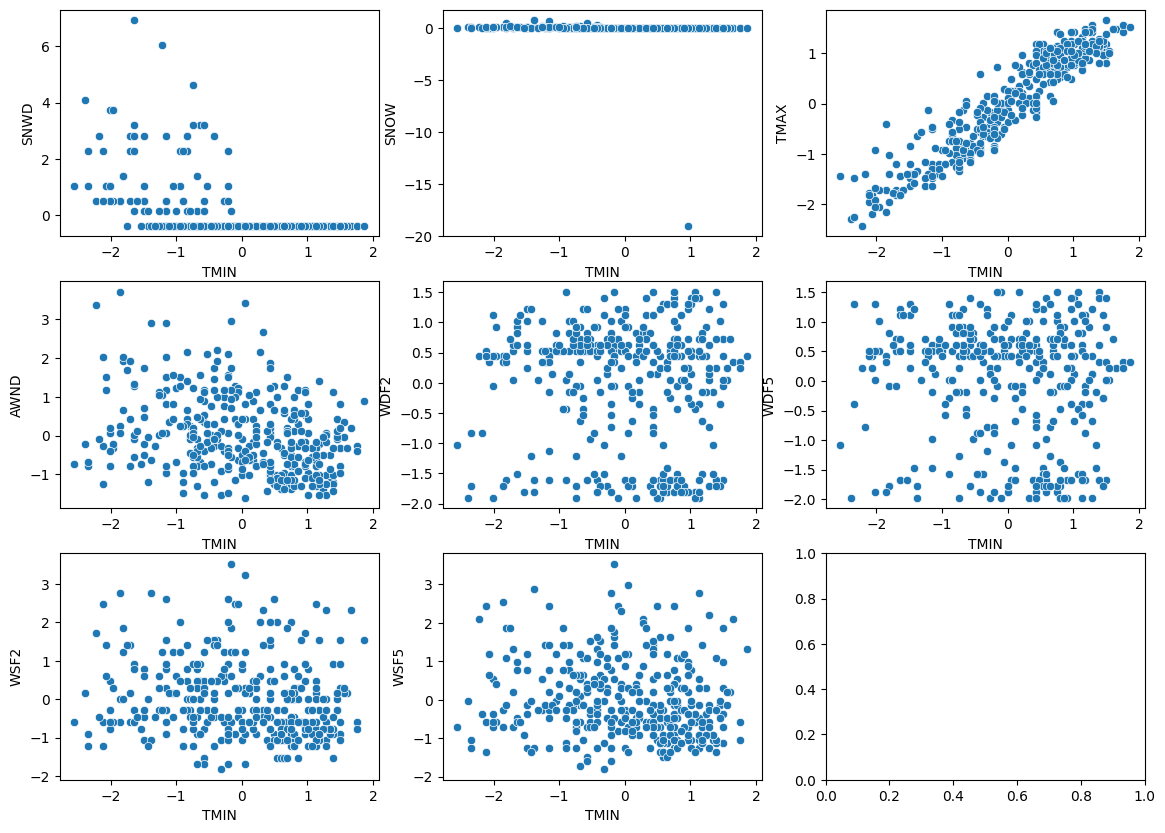

In [70]:
fig, axs = plt.subplots(3, 3, figsize=(14, 10))
seaborn.scatterplot(x="TMIN",y="SNWD",ax=axs[0, 0],data=data)
seaborn.scatterplot(x="TMIN",y="SNOW",ax=axs[0, 1],data=data)
seaborn.scatterplot(x="TMIN",y="TMAX",ax=axs[0, 2],data=data)
seaborn.scatterplot(x="TMIN",y="AWND",ax=axs[1, 0],data=data)# take this only one graph for paper
seaborn.scatterplot(x="TMIN",y="WDF2",ax=axs[1, 1],data=data)
seaborn.scatterplot(x="TMIN",y="WDF5",ax=axs[1, 2],data=data)
seaborn.scatterplot(x="TMIN",y="WSF2",ax=axs[2, 0],data=data)
seaborn.scatterplot(x="TMIN",y="WSF5",ax=axs[2, 1],data=data)


## **<font color = orange>AWND w.r.t all other input parameters** 

c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

<Axes: xlabel='AWND', ylabel='WSF5'>

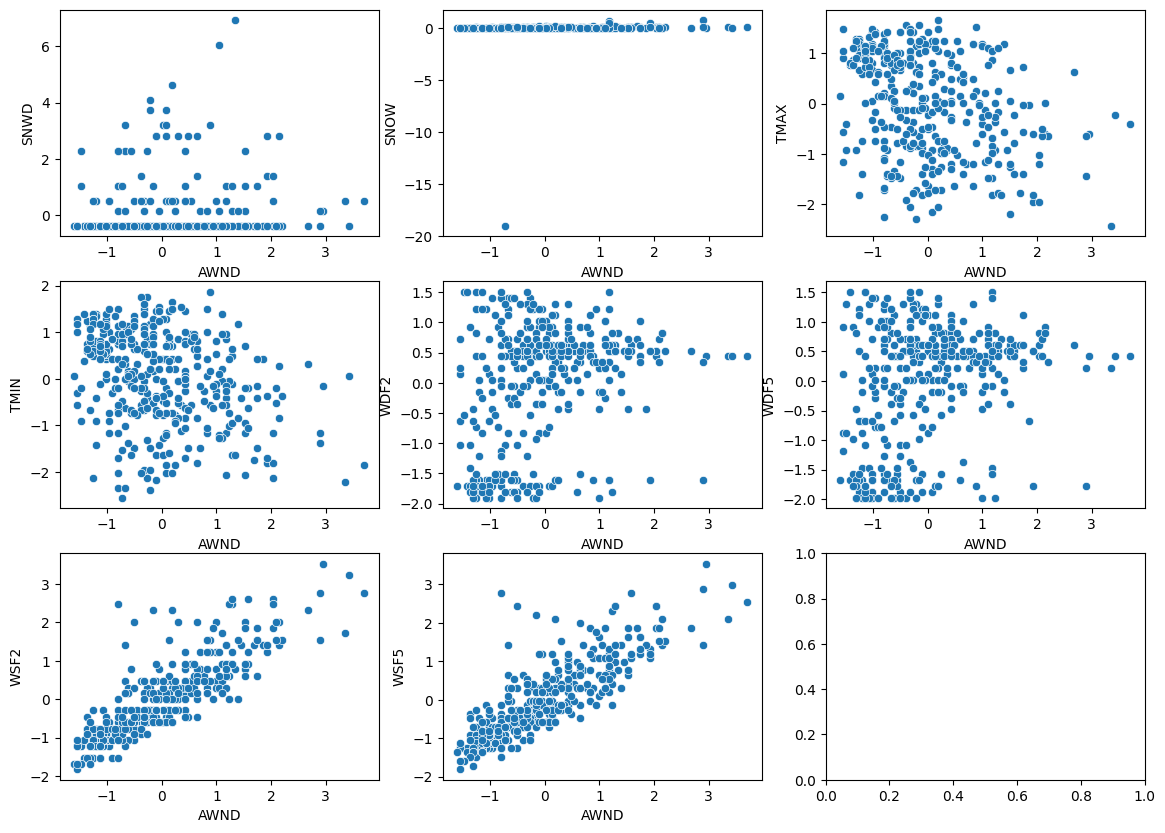

In [71]:
fig, axs = plt.subplots(3, 3, figsize=(14, 10))
seaborn.scatterplot(x="AWND",y="SNWD",ax=axs[0, 0],data=data)
seaborn.scatterplot(x="AWND",y="SNOW",ax=axs[0, 1],data=data)
seaborn.scatterplot(x="AWND",y="TMAX",ax=axs[0, 2],data=data)
seaborn.scatterplot(x="AWND",y="TMIN",ax=axs[1, 0],data=data)# take this only one graph for paper
seaborn.scatterplot(x="AWND",y="WDF2",ax=axs[1, 1],data=data)
seaborn.scatterplot(x="AWND",y="WDF5",ax=axs[1, 2],data=data)
seaborn.scatterplot(x="AWND",y="WSF2",ax=axs[2, 0],data=data)
seaborn.scatterplot(x="AWND",y="WSF5",ax=axs[2, 1],data=data)


## **<font color = orange>WDF2 w.r.t all other input parameters** 

c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

<Axes: xlabel='WDF2', ylabel='WSF5'>

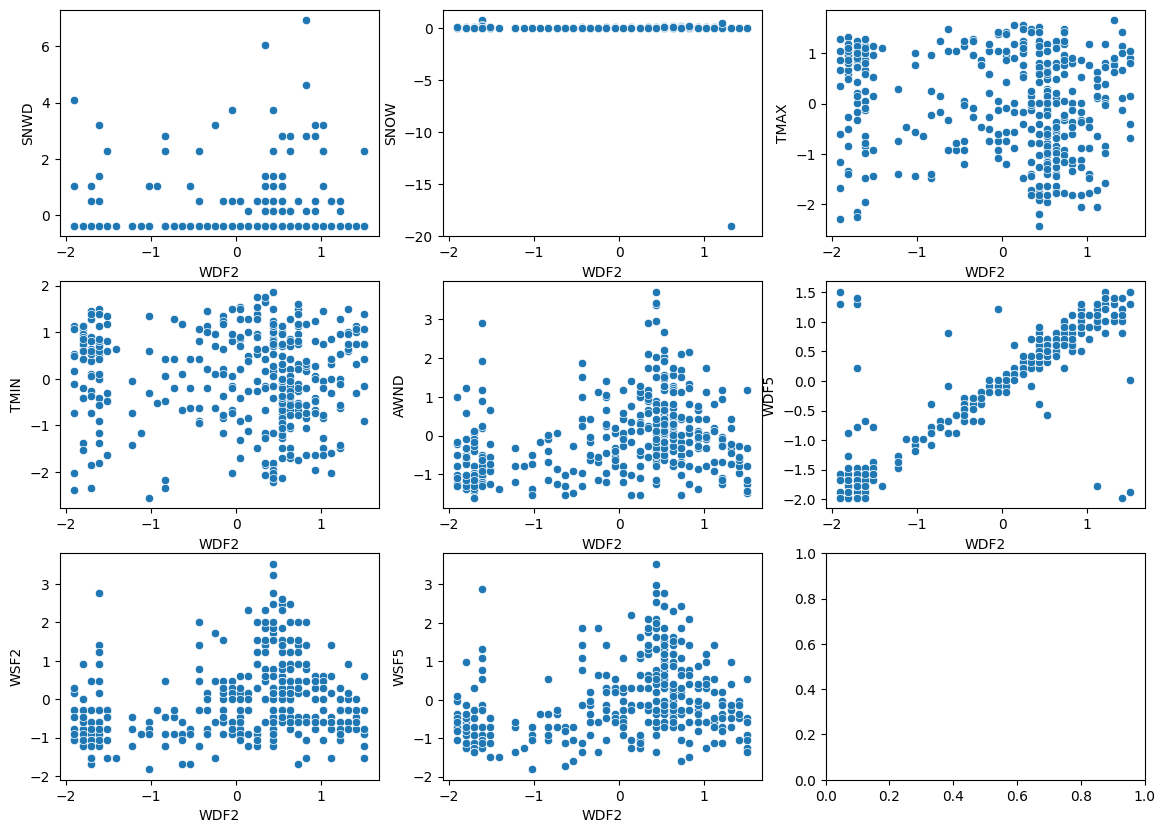

In [72]:
fig, axs = plt.subplots(3, 3, figsize=(14, 10))
seaborn.scatterplot(x="WDF2",y="SNWD",ax=axs[0, 0],data=data)
seaborn.scatterplot(x="WDF2",y="SNOW",ax=axs[0, 1],data=data)
seaborn.scatterplot(x="WDF2",y="TMAX",ax=axs[0, 2],data=data)
seaborn.scatterplot(x="WDF2",y="TMIN",ax=axs[1, 0],data=data)# take this only one graph for paper
seaborn.scatterplot(x="WDF2",y="AWND",ax=axs[1, 1],data=data)
seaborn.scatterplot(x="WDF2",y="WDF5",ax=axs[1, 2],data=data)
seaborn.scatterplot(x="WDF2",y="WSF2",ax=axs[2, 0],data=data)
seaborn.scatterplot(x="WDF2",y="WSF5",ax=axs[2, 1],data=data)


## **<font color = orange>WDF5 w.r.t all other input parameters** 

c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

<Axes: xlabel='WDF5', ylabel='WSF5'>

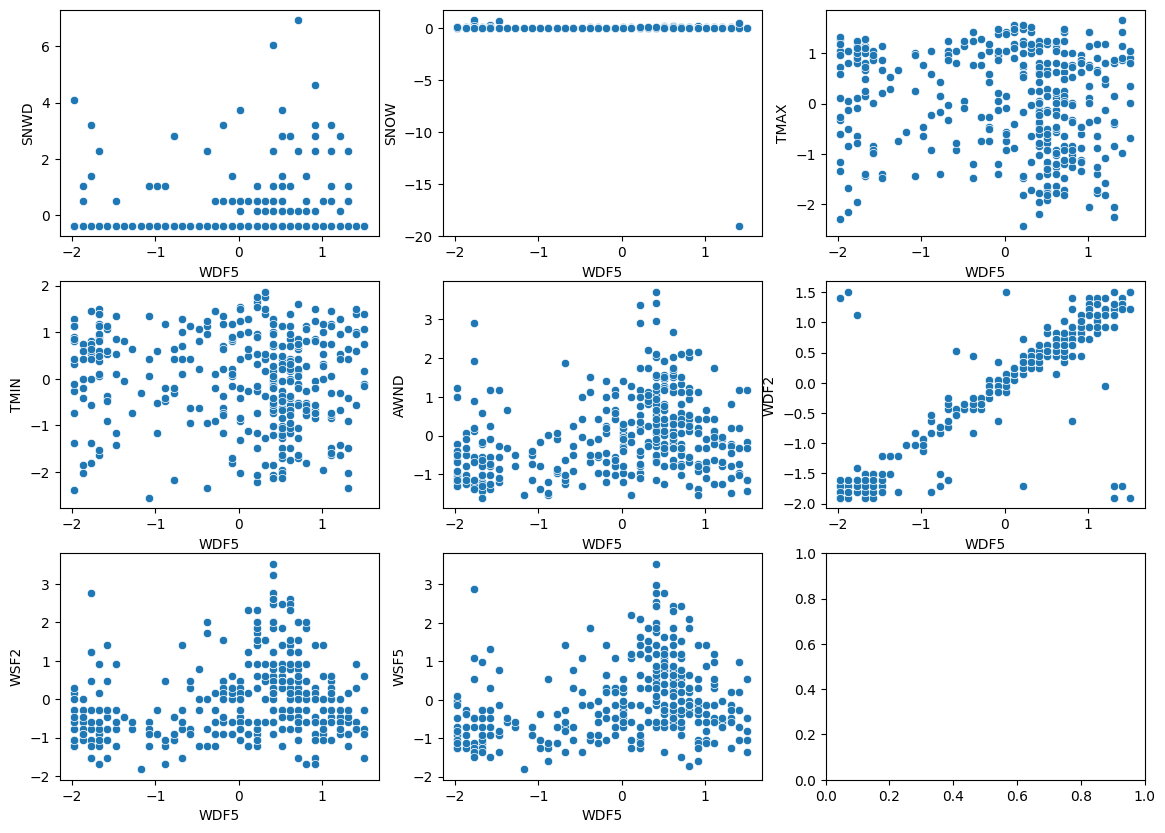

In [73]:
fig, axs = plt.subplots(3, 3, figsize=(14, 10))
seaborn.scatterplot(x="WDF5",y="SNWD",ax=axs[0, 0],data=data)
seaborn.scatterplot(x="WDF5",y="SNOW",ax=axs[0, 1],data=data)
seaborn.scatterplot(x="WDF5",y="TMAX",ax=axs[0, 2],data=data)
seaborn.scatterplot(x="WDF5",y="TMIN",ax=axs[1, 0],data=data)
seaborn.scatterplot(x="WDF5",y="AWND",ax=axs[1, 1],data=data)
seaborn.scatterplot(x="WDF5",y="WDF2",ax=axs[1, 2],data=data)# take this only one graph for paper
seaborn.scatterplot(x="WDF5",y="WSF2",ax=axs[2, 0],data=data)
seaborn.scatterplot(x="WDF5",y="WSF5",ax=axs[2, 1],data=data)


## **<font color = orange>WSF2 w.r.t all other input parameters** 

c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

<Axes: xlabel='WSF2', ylabel='WSF5'>

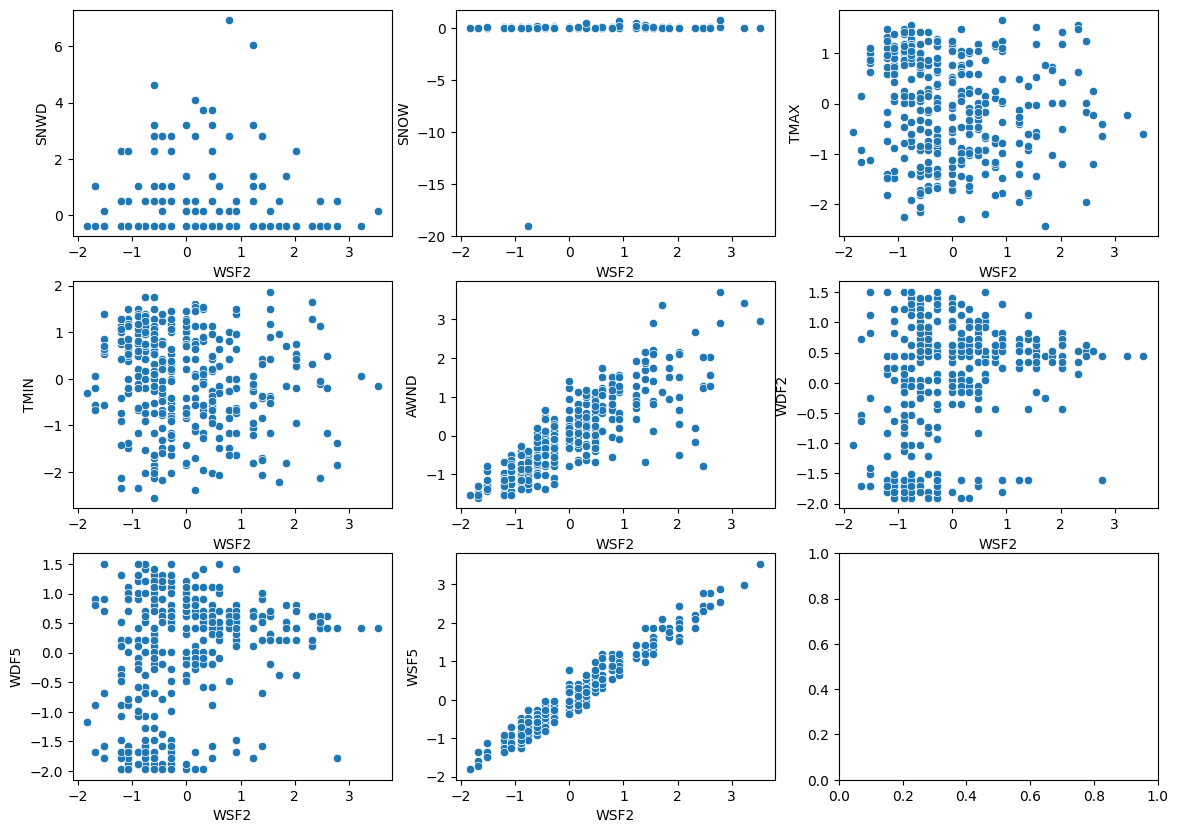

In [74]:
fig, axs = plt.subplots(3, 3, figsize=(14, 10))
seaborn.scatterplot(x="WSF2",y="SNWD",ax=axs[0, 0],data=data)
seaborn.scatterplot(x="WSF2",y="SNOW",ax=axs[0, 1],data=data)
seaborn.scatterplot(x="WSF2",y="TMAX",ax=axs[0, 2],data=data)
seaborn.scatterplot(x="WSF2",y="TMIN",ax=axs[1, 0],data=data)
seaborn.scatterplot(x="WSF2",y="AWND",ax=axs[1, 1],data=data)
seaborn.scatterplot(x="WSF2",y="WDF2",ax=axs[1, 2],data=data)
seaborn.scatterplot(x="WSF2",y="WDF5",ax=axs[2, 0],data=data)
seaborn.scatterplot(x="WSF2",y="WSF5",ax=axs[2, 1],data=data)


## **<font color = orange>WSF5 w.r.t all other input parameters** 

c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

<Axes: xlabel='WSF5', ylabel='WSF2'>

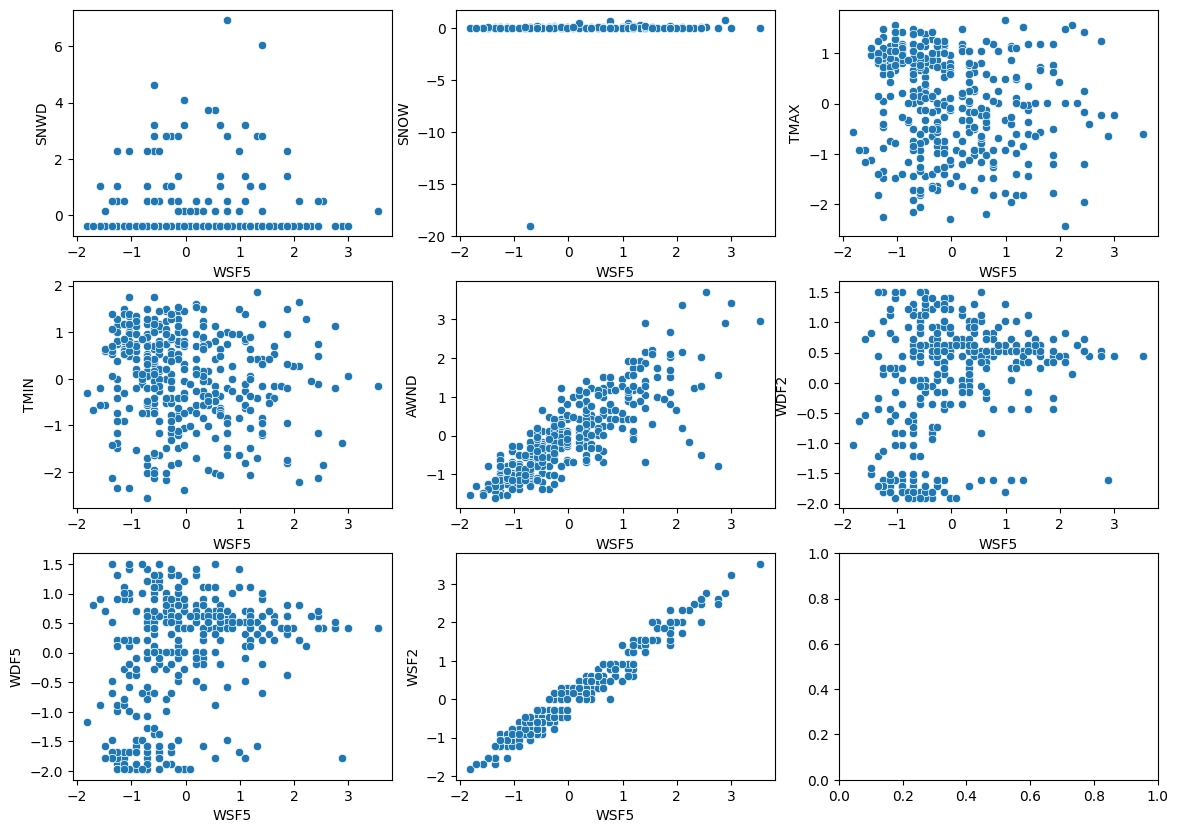

In [75]:
fig, axs = plt.subplots(3, 3, figsize=(14, 10))
seaborn.scatterplot(x="WSF5",y="SNWD",ax=axs[0, 0],data=data)
seaborn.scatterplot(x="WSF5",y="SNOW",ax=axs[0, 1],data=data)
seaborn.scatterplot(x="WSF5",y="TMAX",ax=axs[0, 2],data=data)
seaborn.scatterplot(x="WSF5",y="TMIN",ax=axs[1, 0],data=data)
seaborn.scatterplot(x="WSF5",y="AWND",ax=axs[1, 1],data=data)
seaborn.scatterplot(x="WSF5",y="WDF2",ax=axs[1, 2],data=data)
seaborn.scatterplot(x="WSF5",y="WDF5",ax=axs[2, 0],data=data)
seaborn.scatterplot(x="WSF5",y="WSF2",ax=axs[2, 1],data=data)

## <font color = "orange">**"GRAPH OF OUTPUT PARAMETERS"**

c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='snow'>

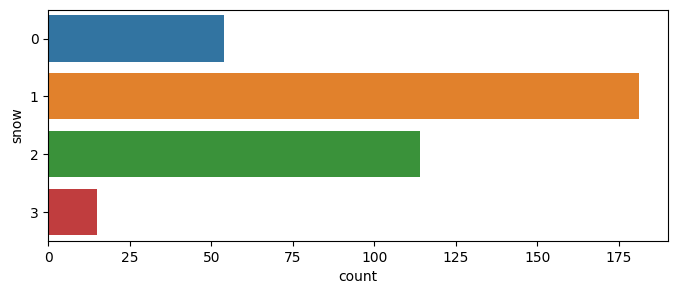

In [76]:
fig_dims = (8, 3)
fig, ax = plt.subplots(figsize=fig_dims)
seaborn.countplot(y = data.snow,ax=ax, data = data)

## <font color= red> **CODE**


## <font color= orange> **MULTI-CLASS SVM**
 

In [88]:
# Load the dataset
data = pd.read_csv("test_in.csv")

# Convert "rain/snow" to binary labels
le = LabelEncoder()
data["snow"] = le.fit_transform(data["snow"])

# Create a SimpleImputer for most frequent strategy
imputer = SimpleImputer(strategy="most_frequent")

# Impute missing values in the "rain/snow" column
data["snow"] = imputer.fit_transform(data[["snow"]])

# Split data into features and target
X = data.drop("snow", axis=1)
y = data["snow"]

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)


# Train an SVM model
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.8272727272727273


# <font color= lightblue>  Improving perform hyperparameter tuning here to improve accuracy 

## <font color= Orange> **Grid Search**

In [78]:
# Load the dataset
data = pd.read_csv("test_in.csv")

# Convert "rain/snow" to binary labels
le = LabelEncoder()
data["snow"] = le.fit_transform(data["snow"])

# Create a SimpleImputer for most frequent strategy
imputer = SimpleImputer(strategy="most_frequent")

# Impute missing values in the "rain/snow" column
data["snow"] = imputer.fit_transform(data[["snow"]])

# Split data into features and target
X = data.drop("snow", axis=1)
y = data["snow"]

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
                'C': [0.1, 1, 10, 100],
                'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
             }

# Create the SVM model
svm_model = SVC()

# Perform GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best Hyperparameters: {'C': 100, 'kernel': 'linear'}
Accuracy: 0.9041095890410958


## <font color="orange"> **F1 SCORE**



In [79]:
from sklearn.metrics import f1_score

# Assuming you have predictions (y_pred) and true labels (y_test)
# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # You can choose 'micro', 'macro', or 'weighted' for the 'average' parameter

# Print the F1 score
print("F1 Score:", f1)


F1 Score: 0.8844298668724677


## <font color="orange"> **F1 SCORE Mathematical calcalculation**



In [80]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Assuming you have predictions (y_pred) and true labels (y_test)
# Calculate the precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = 2 * (precision * recall) / (precision + recall)

# Print the precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.8663457978526472
Recall: 0.9041095890410958
F1 Score: 0.8848249428507589


c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## <font color = "orange"> **Confusion Matrix**

In [81]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Assuming you have predictions (y_pred) and true labels (y_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # You can choose 'micro', 'macro', or 'weighted' for the 'average' parameter

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.9041095890410958
F1 Score: 0.8844298668724677
Precision: 0.8663457978526472
Recall: 0.9041095890410958


c:\Users\Sudeesh Kumar V\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## <font color = "orange"> **Graphical Representation of Confusion Matrix**

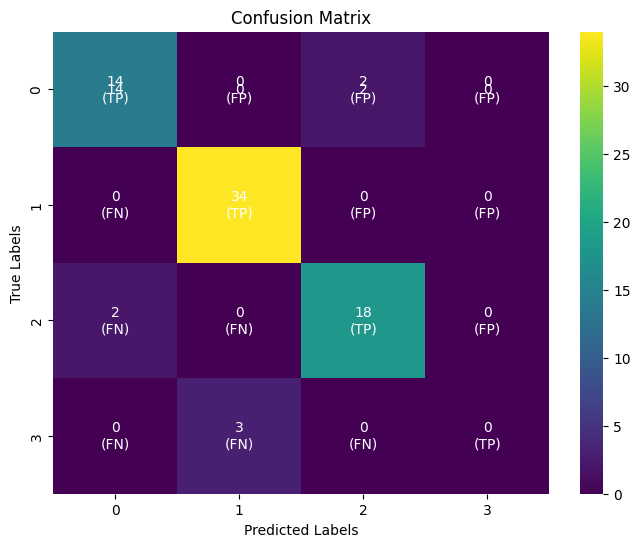

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have true labels (y_test) and predicted labels (y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix with a different color scheme
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="viridis")

# Add labels for TP, TN, FP, and FN
for i in range(len(confusion_mat)):
    for j in range(len(confusion_mat[i])):
        plt.text(j + 0.5, i + 0.5, f"{confusion_mat[i][j]}\n(TP)" if i == j else f"{confusion_mat[i][j]}\n(FP)" if j > i else f"{confusion_mat[i][j]}\n(FN)", ha='center', va='center', color='white')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## <font color = "orange"> **Graphical Representation of Evaluation Metrix**

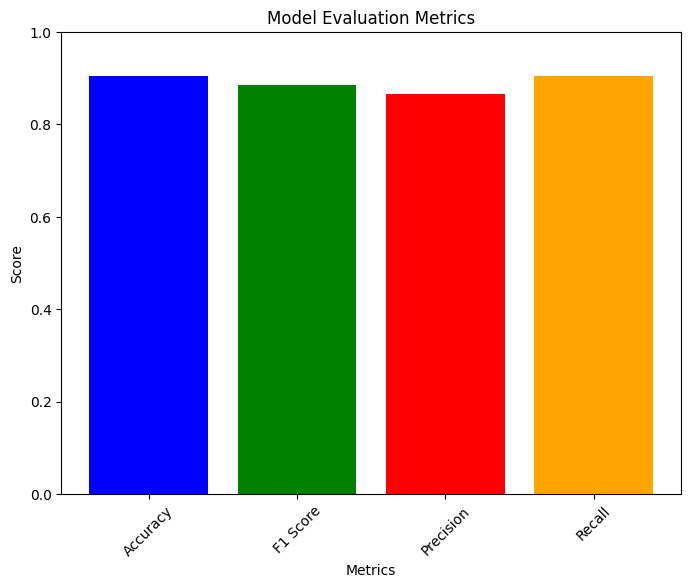

In [83]:
import matplotlib.pyplot as plt

# Define your evaluation metrics
metrics = ["Accuracy", "F1 Score", "Precision", "Recall"]
values = [accuracy, f1, precision, recall]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Model Evaluation Metrics")
plt.ylim(0, 1)  # Set the y-axis range if needed
plt.xticks(rotation=45)  # Rotate metric names for better readability
plt.show()



## <font color = "orange"> **PREDICTING USING USER'S INPUT**

In [89]:
# USER INPUT DATA
dat=[[1.090608598,1.399761958,0.425421055,-1.950514032,-1.803735654,
      1.917751045,-1.6085257,-1.774030546,1.229165808,1.091295357]]     
# dat = [[PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5]]
ot = svm_model.predict(dat)
print("The SnowFall is:")
if(ot==0):
    print("Heavy Snow")
elif(ot==1):
    print("Littel Snow")
elif(ot==2):
    print("Moderate Snow")
else:
    print("Slight Snow")



The SnowFall is:
Heavy Snow
